In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA LOADING

In [3]:
from google.colab import files
uploaded = files.upload()

# After uploading, load the file
import pandas as pd
import io

# Replace 'heart.csv' with the actual name of your file
heart_data = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

# Display the first few rows of the dataset
heart_data.head()


Saving heart.csv to heart.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Check the data types for each column
data_type = heart_data.dtypes

print(data_type)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [5]:
# Get summary statistics of the dataset
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Check for missing values in the dataset
missing_values = heart_data.isnull().sum()

# Impute missing values in 'oldpeak' with the median
heart_data['oldpeak'] = heart_data['oldpeak'].fillna(heart_data['oldpeak'].median())

# Impute missing values in integer columns with the mode (most frequent value)
heart_data['sex'] = heart_data['sex'].fillna(heart_data['sex'].mode()[0])
heart_data['cp'] = heart_data['cp'].fillna(heart_data['cp'].mode()[0])
heart_data['fbs'] = heart_data['fbs'].fillna(heart_data['fbs'].mode()[0])
heart_data['restecg'] = heart_data['restecg'].fillna(heart_data['restecg'].mode()[0])
heart_data['exang'] = heart_data['exang'].fillna(heart_data['exang'].mode()[0])
heart_data['slope'] = heart_data['slope'].fillna(heart_data['slope'].mode()[0])
heart_data['ca'] = heart_data['ca'].fillna(heart_data['ca'].mode()[0])
heart_data['thal'] = heart_data['thal'].fillna(heart_data['thal'].mode()[0])

# Verify if there are any missing values left
print(heart_data.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Exploratory Data Analysis(EDA)

### Univariate analysis

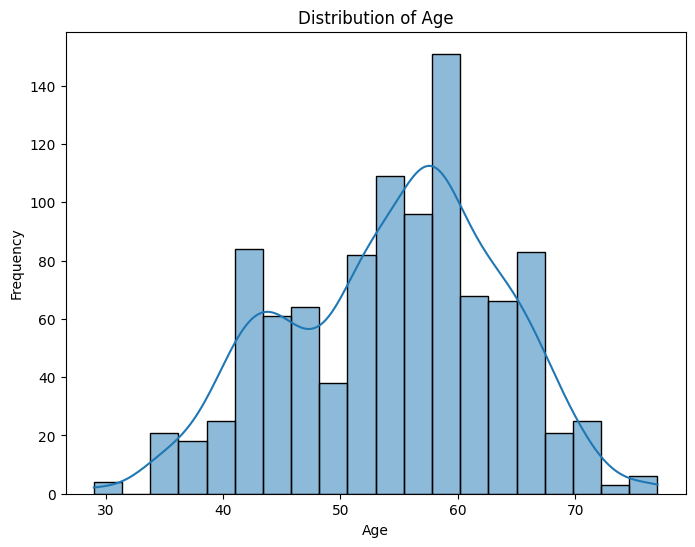

In [7]:
# Plotting the distribution of 'age'
plt.figure(figsize=(8, 6))
sns.histplot(heart_data['age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


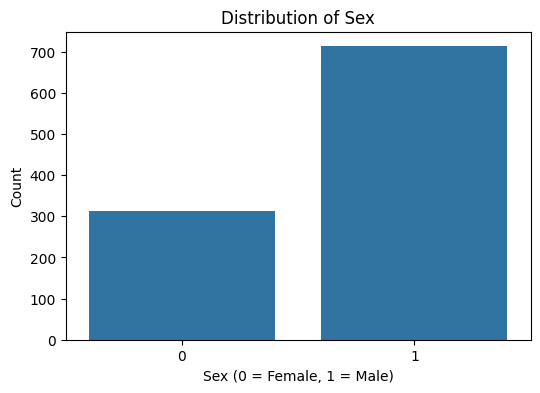

In [8]:
# Plotting the count of 'sex' (Male = 1, Female = 0)
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=heart_data)
plt.title('Distribution of Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


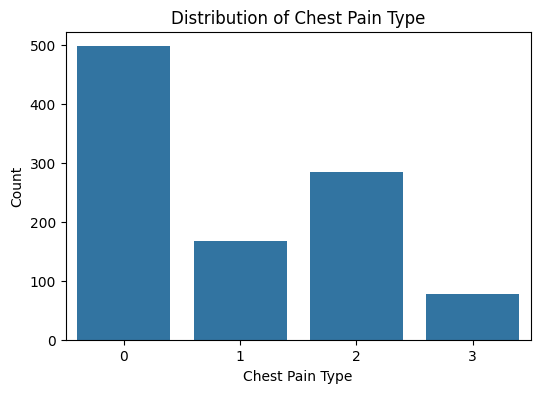

In [9]:
# Plotting the count of 'cp' (Chest pain types)
plt.figure(figsize=(6, 4))
sns.countplot(x='cp', data=heart_data)
plt.title('Distribution of Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


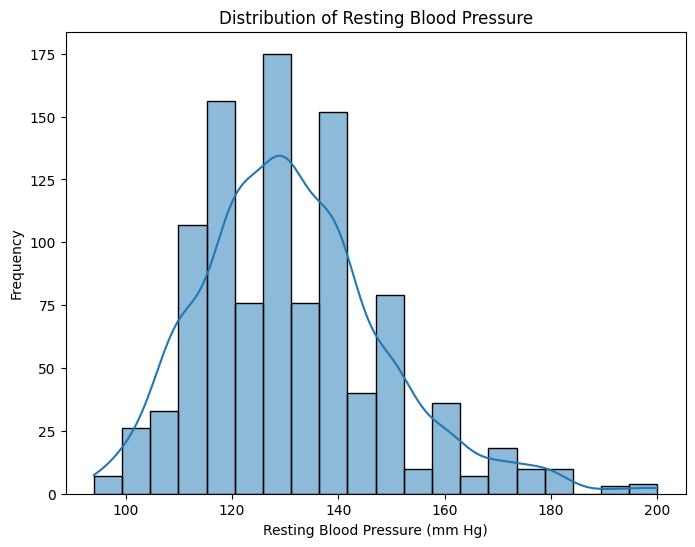

In [10]:
# Plotting the distribution of 'trestbps'
plt.figure(figsize=(8, 6))
sns.histplot(heart_data['trestbps'], kde=True, bins=20)
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()


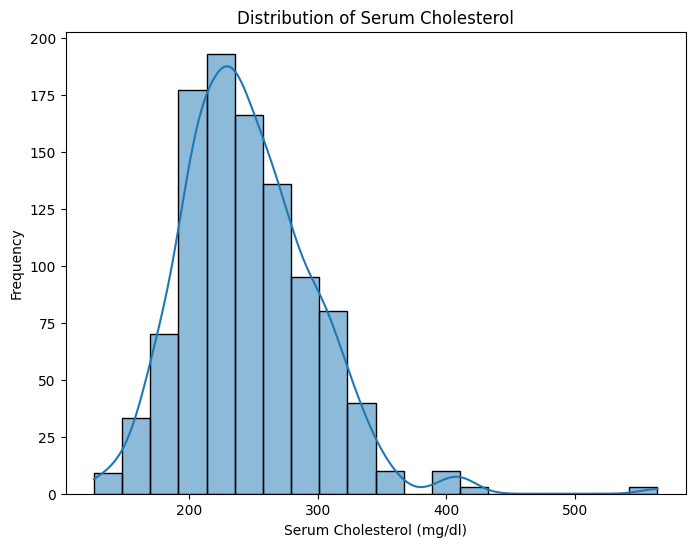

In [11]:
# Plotting the distribution of 'chol' (Serum cholesterol)
plt.figure(figsize=(8, 6))
sns.histplot(heart_data['chol'], kde=True, bins=20)
plt.title('Distribution of Serum Cholesterol')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.show()


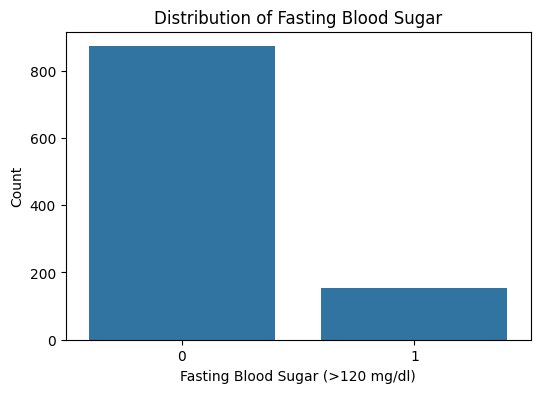

In [12]:
# Plotting the count of 'fbs' (Fasting blood sugar > 120 mg/dl)
plt.figure(figsize=(6, 4))
sns.countplot(x='fbs', data=heart_data)
plt.title('Distribution of Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar (>120 mg/dl)')
plt.ylabel('Count')
plt.show()


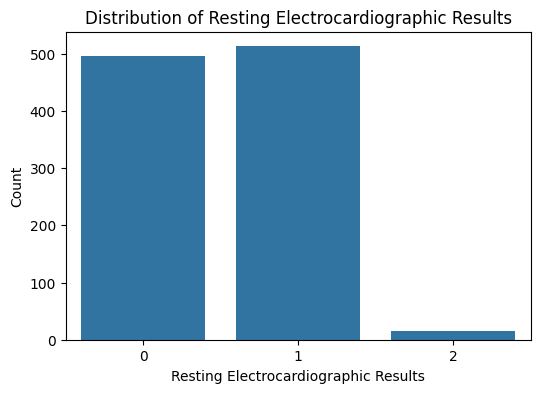

In [13]:
# Plotting the count of 'restecg' (Resting Electrocardiographic Results)
plt.figure(figsize=(6, 4))
sns.countplot(x='restecg', data=heart_data)
plt.title('Distribution of Resting Electrocardiographic Results')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Count')
plt.show()


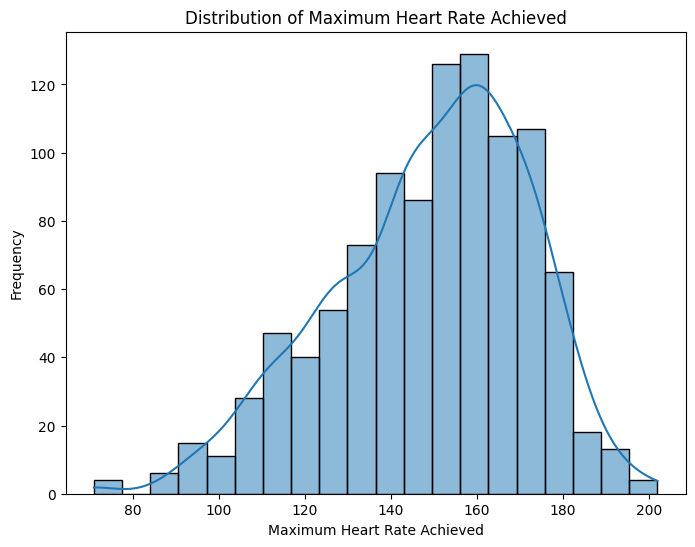

In [14]:
# Plotting the distribution of 'thalach' (Maximum heart rate achieved)
plt.figure(figsize=(8, 6))
sns.histplot(heart_data['thalach'], kde=True, bins=20)
plt.title('Distribution of Maximum Heart Rate Achieved')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.show()


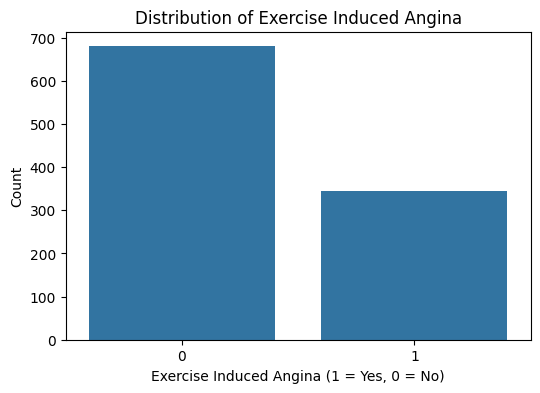

In [15]:
# Plotting the count of 'exang' (Exercise Induced Angina)
plt.figure(figsize=(6, 4))
sns.countplot(x='exang', data=heart_data)
plt.title('Distribution of Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


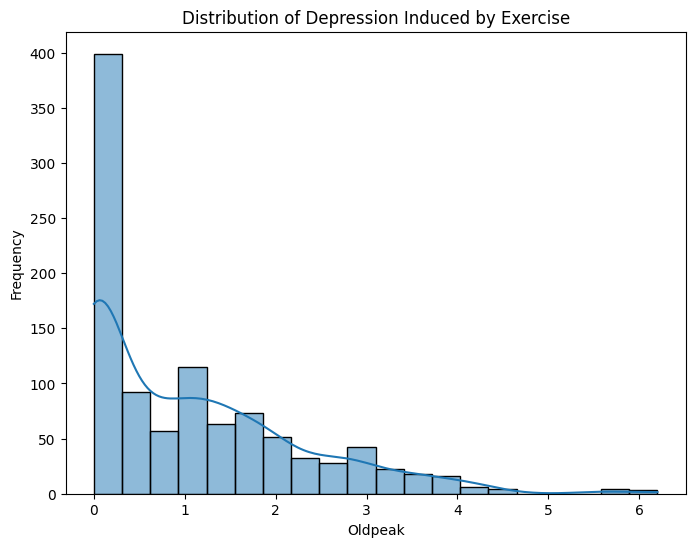

In [16]:
# Plotting the distribution of 'oldpeak' (Depression induced by exercise)
plt.figure(figsize=(8, 6))
sns.histplot(heart_data['oldpeak'], kde=True, bins=20)
plt.title('Distribution of Depression Induced by Exercise')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()


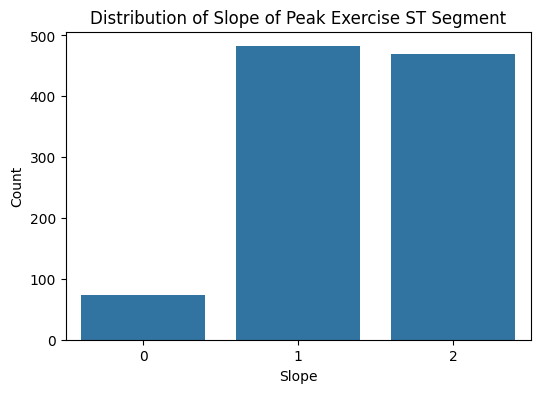

In [17]:
# Plotting the count of 'slope' (Slope of peak exercise ST segment)
plt.figure(figsize=(6, 4))
sns.countplot(x='slope', data=heart_data)
plt.title('Distribution of Slope of Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()


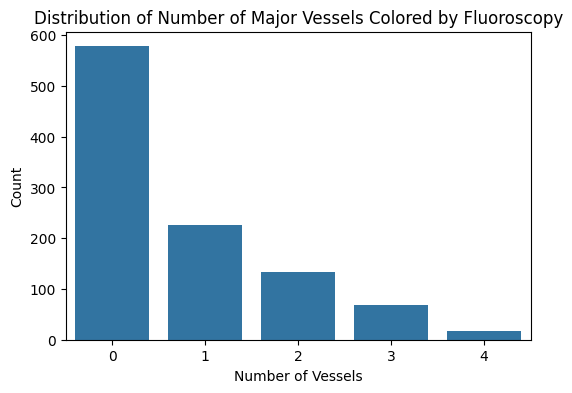

In [18]:
# Plotting the count of 'ca' (Number of major vessels colored by fluoroscopy)
plt.figure(figsize=(6, 4))
sns.countplot(x='ca', data=heart_data)
plt.title('Distribution of Number of Major Vessels Colored by Fluoroscopy')
plt.xlabel('Number of Vessels')
plt.ylabel('Count')
plt.show()


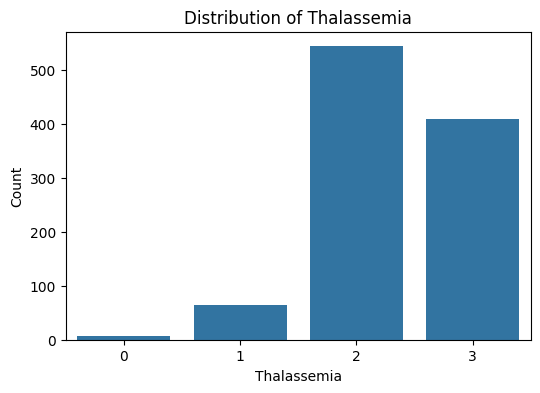

In [19]:
# Plotting the count of 'thal' (Thalassemia)
plt.figure(figsize=(6, 4))
sns.countplot(x='thal', data=heart_data)
plt.title('Distribution of Thalassemia')
plt.xlabel('Thalassemia')
plt.ylabel('Count')
plt.show()


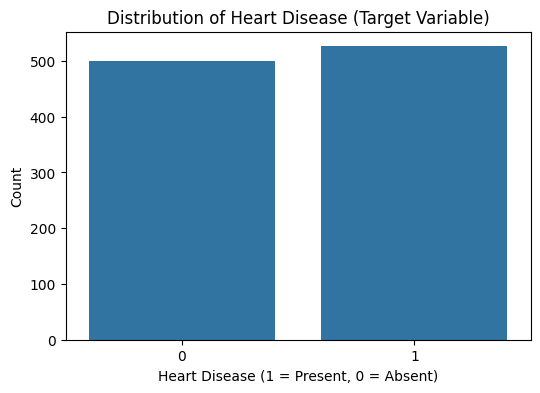

In [20]:
# Plotting the count of 'target' (Presence of heart disease)
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=heart_data)
plt.title('Distribution of Heart Disease (Target Variable)')
plt.xlabel('Heart Disease (1 = Present, 0 = Absent)')
plt.ylabel('Count')
plt.show()


### Bivariate Analysis

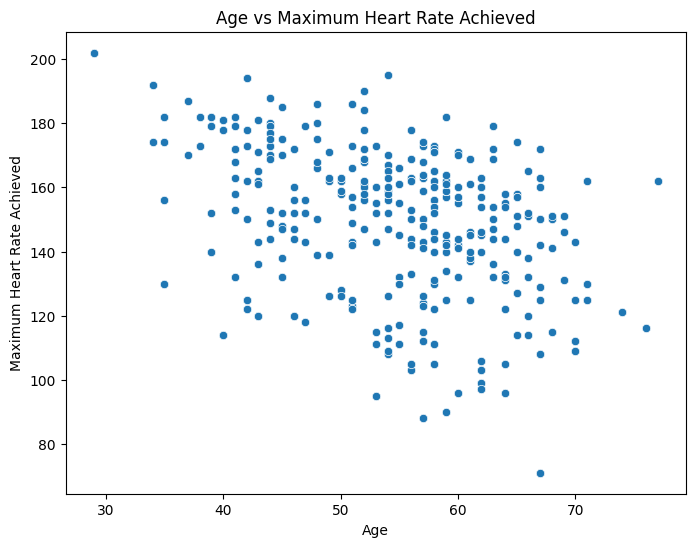

In [21]:
# Scatter plot of 'age' vs 'thalach' (Maximum Heart Rate Achieved)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalach', data=heart_data)
plt.title('Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()


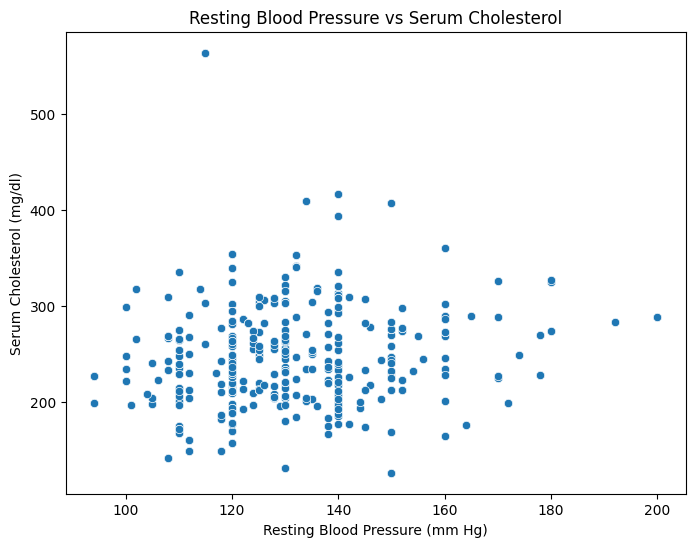

In [22]:
# Scatter plot of 'trestbps' (Resting Blood Pressure) vs 'chol' (Serum Cholesterol)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trestbps', y='chol', data=heart_data)
plt.title('Resting Blood Pressure vs Serum Cholesterol')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.show()


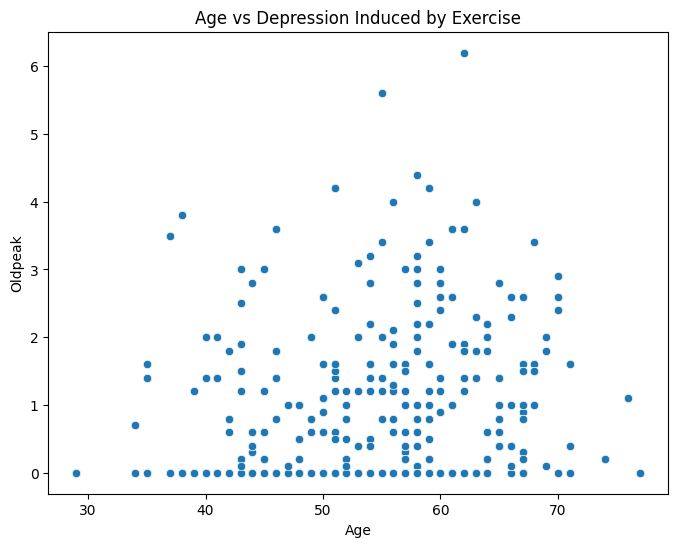

In [23]:
# Scatter plot of 'age' vs 'oldpeak' (Depression Induced by Exercise)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='oldpeak', data=heart_data)
plt.title('Age vs Depression Induced by Exercise')
plt.xlabel('Age')
plt.ylabel('Oldpeak')
plt.show()


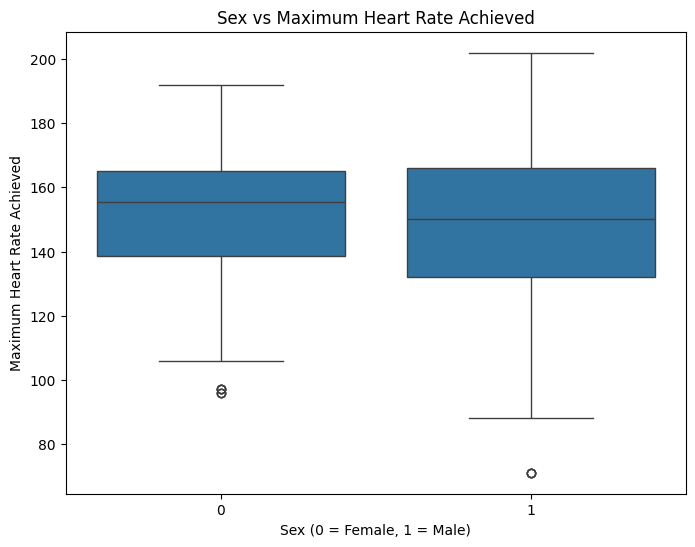

In [24]:
# Box plot of 'sex' (Male vs Female) vs 'thalach' (Maximum Heart Rate Achieved)
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='thalach', data=heart_data)
plt.title('Sex vs Maximum Heart Rate Achieved')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()


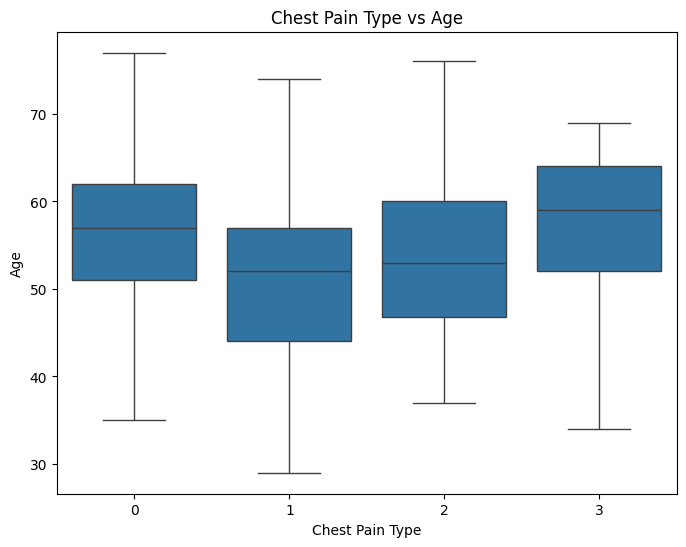

In [25]:
# Box plot of 'cp' (Chest Pain Type) vs 'age'
plt.figure(figsize=(8, 6))
sns.boxplot(x='cp', y='age', data=heart_data)
plt.title('Chest Pain Type vs Age')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.show()


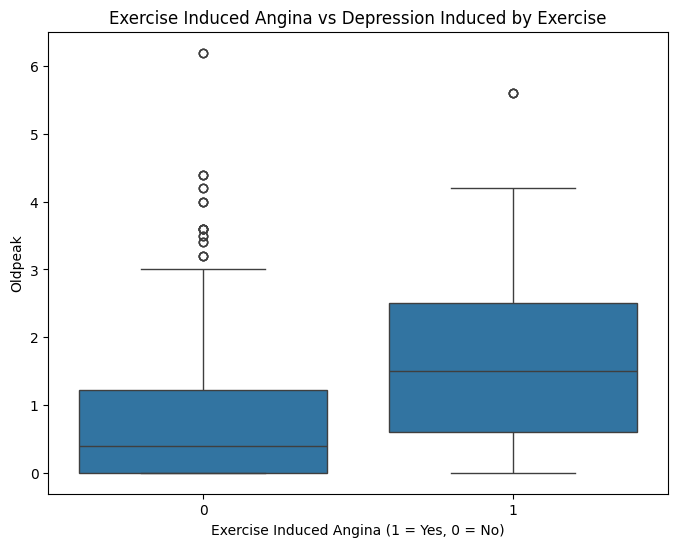

In [26]:
# Box plot of 'exang' (Exercise Induced Angina) vs 'oldpeak' (Depression Induced by Exercise)
plt.figure(figsize=(8, 6))
sns.boxplot(x='exang', y='oldpeak', data=heart_data)
plt.title('Exercise Induced Angina vs Depression Induced by Exercise')
plt.xlabel('Exercise Induced Angina (1 = Yes, 0 = No)')
plt.ylabel('Oldpeak')
plt.show()


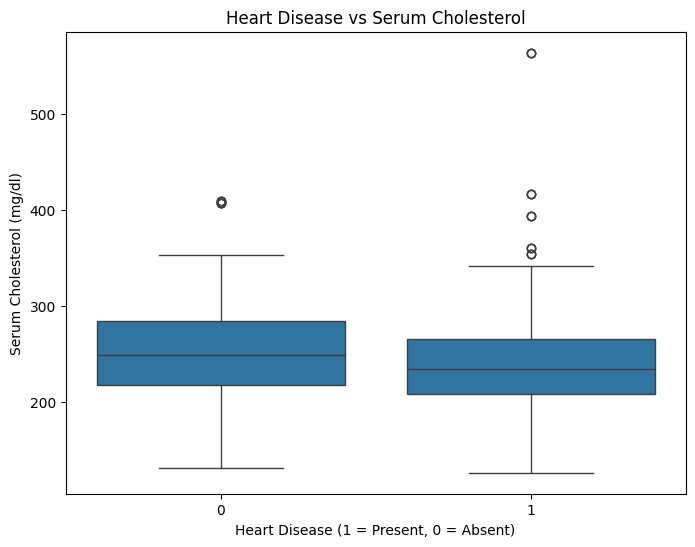

In [27]:
# Box plot of 'target' (Heart Disease) vs 'chol' (Serum Cholesterol)
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=heart_data)
plt.title('Heart Disease vs Serum Cholesterol')
plt.xlabel('Heart Disease (1 = Present, 0 = Absent)')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.show()


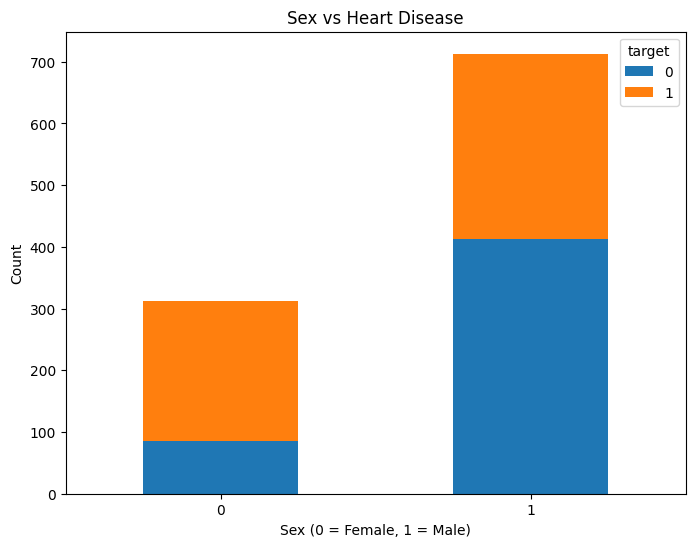

In [28]:
# Stacked bar plot of 'sex' vs 'target' (Heart Disease)
pd.crosstab(heart_data['sex'], heart_data['target']).plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Sex vs Heart Disease')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


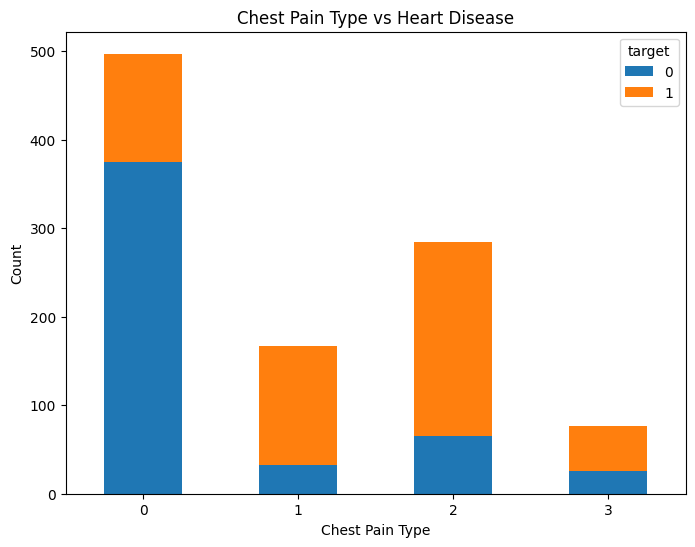

In [29]:
# Stacked bar plot of 'cp' (Chest Pain Type) vs 'target' (Heart Disease)
pd.crosstab(heart_data['cp'], heart_data['target']).plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


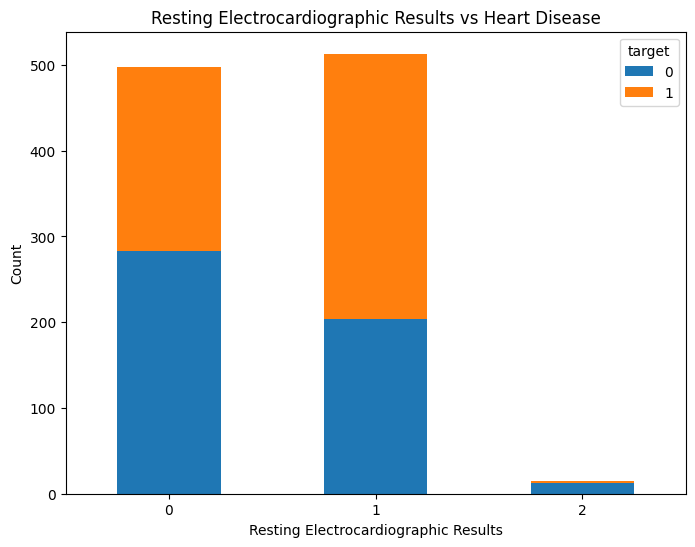

In [30]:
# Stacked bar plot of 'restecg' (Resting Electrocardiographic Results) vs 'target' (Heart Disease)
pd.crosstab(heart_data['restecg'], heart_data['target']).plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Resting Electrocardiographic Results vs Heart Disease')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


### Multivariate Analysis

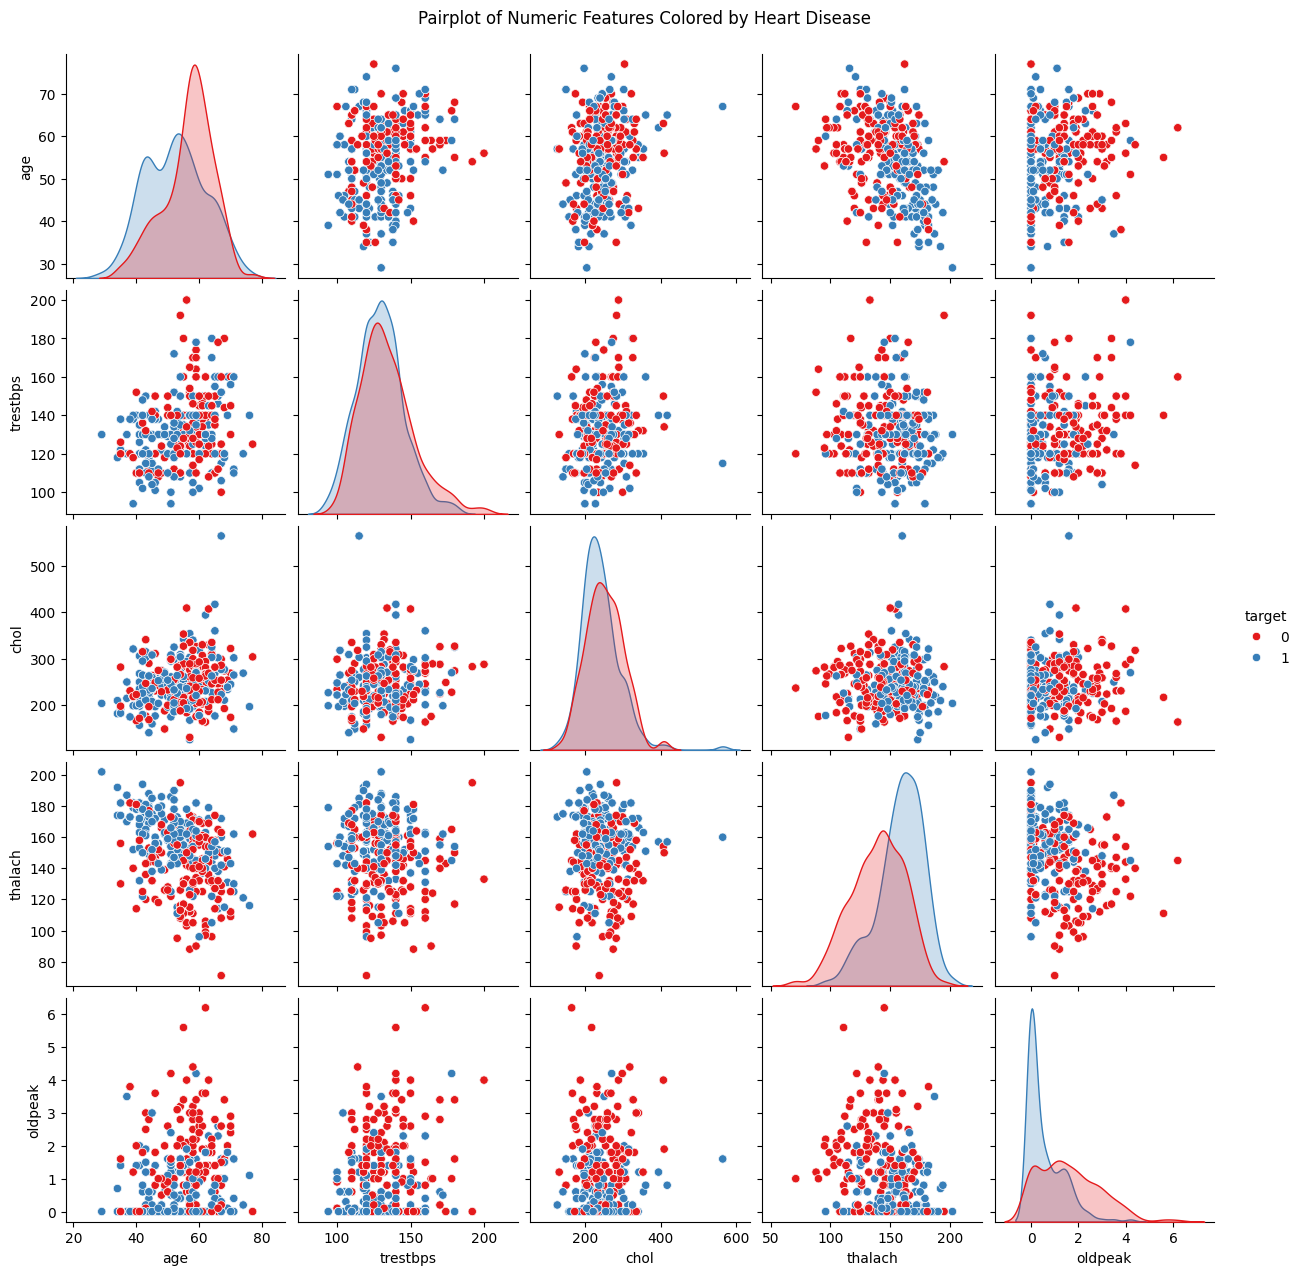

In [31]:
# Pairplot of numeric features colored by 'target' (Heart Disease)
sns.pairplot(heart_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target', palette='Set1')
plt.suptitle('Pairplot of Numeric Features Colored by Heart Disease', y=1.02)
plt.show()


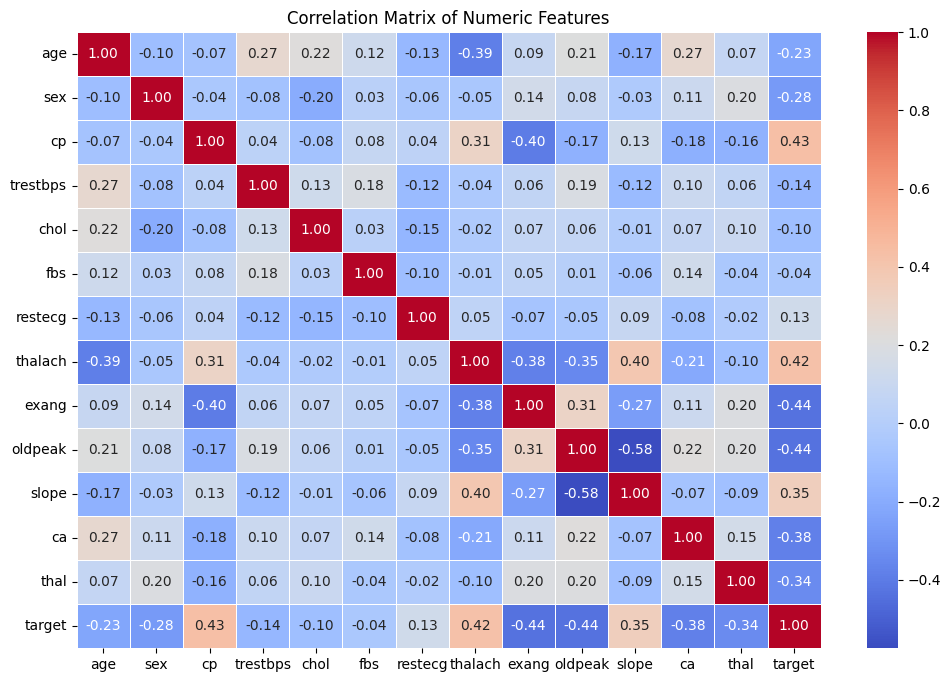

In [32]:
# Correlation matrix with a hue on 'target' (Heart Disease)
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


<Axes3D: xlabel='Age'>

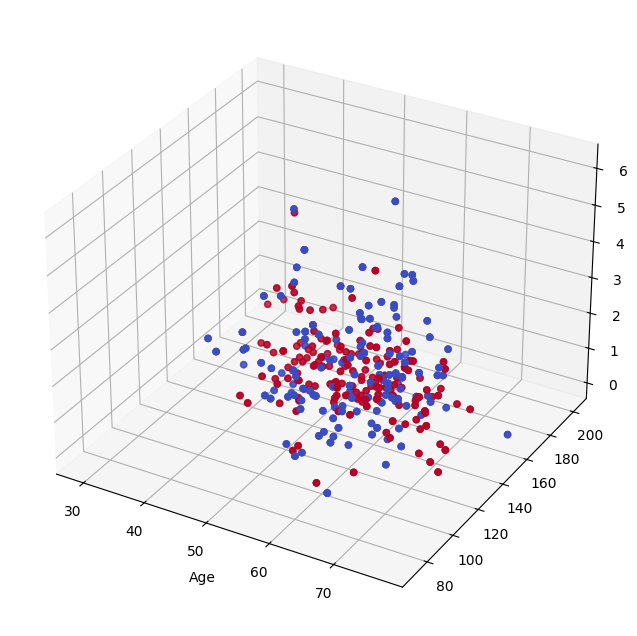

In [33]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot of 'age', 'thalach', and 'oldpeak' colored by 'target'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting
scatter = ax.scatter(heart_data['age'], heart_data['thalach'], heart_data['oldpeak'], c=heart_data['target'], cmap='coolwarm')
ax.set_xlabel('Age')
ax


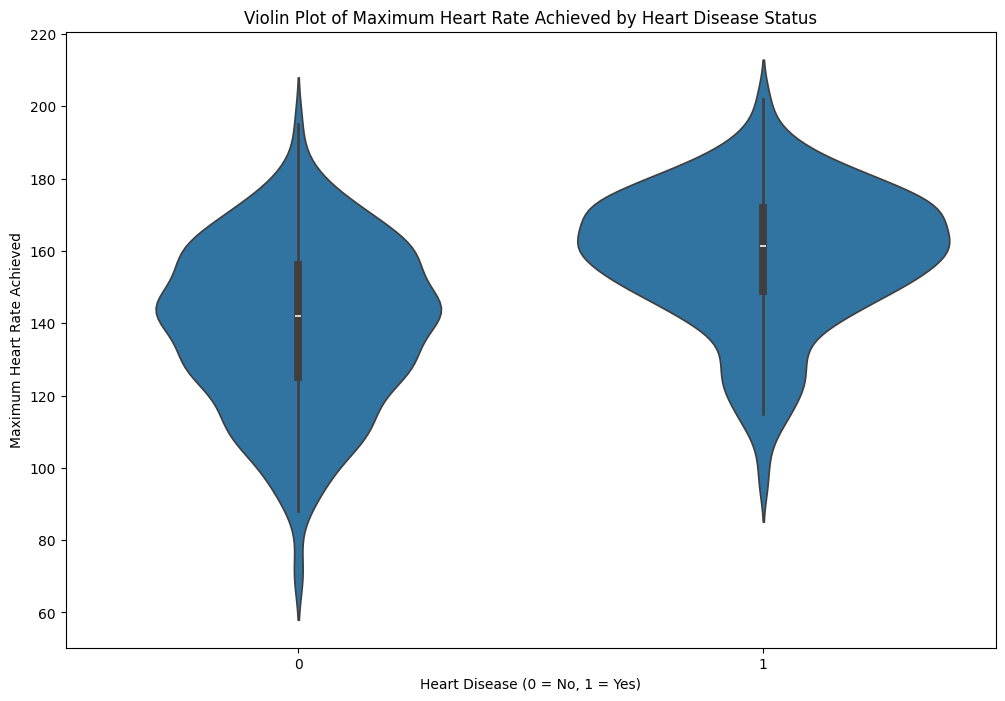

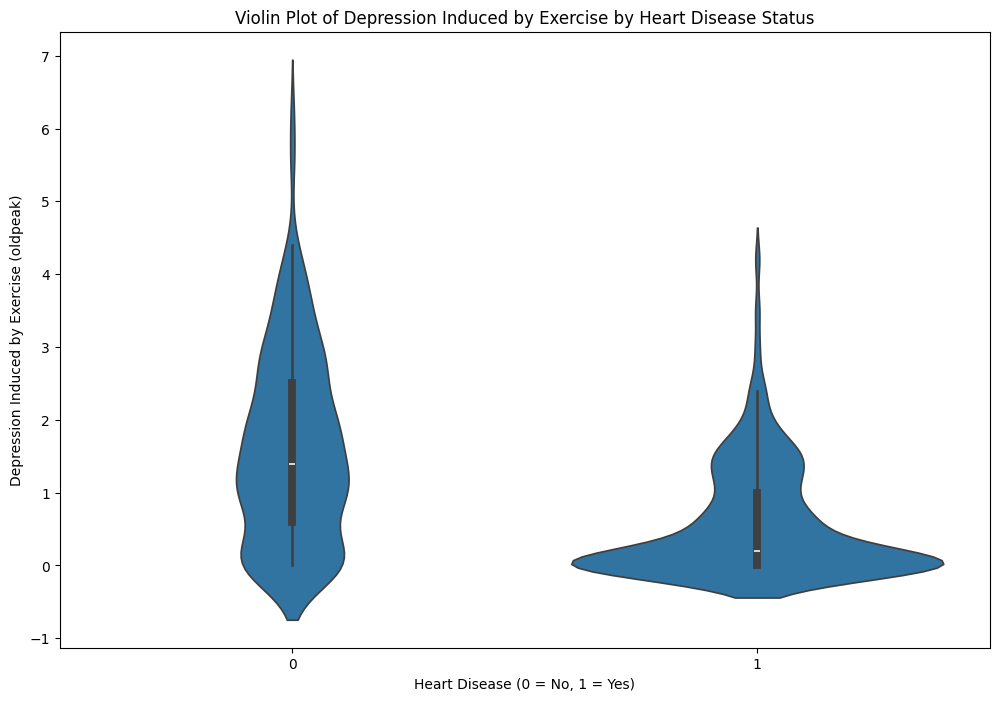

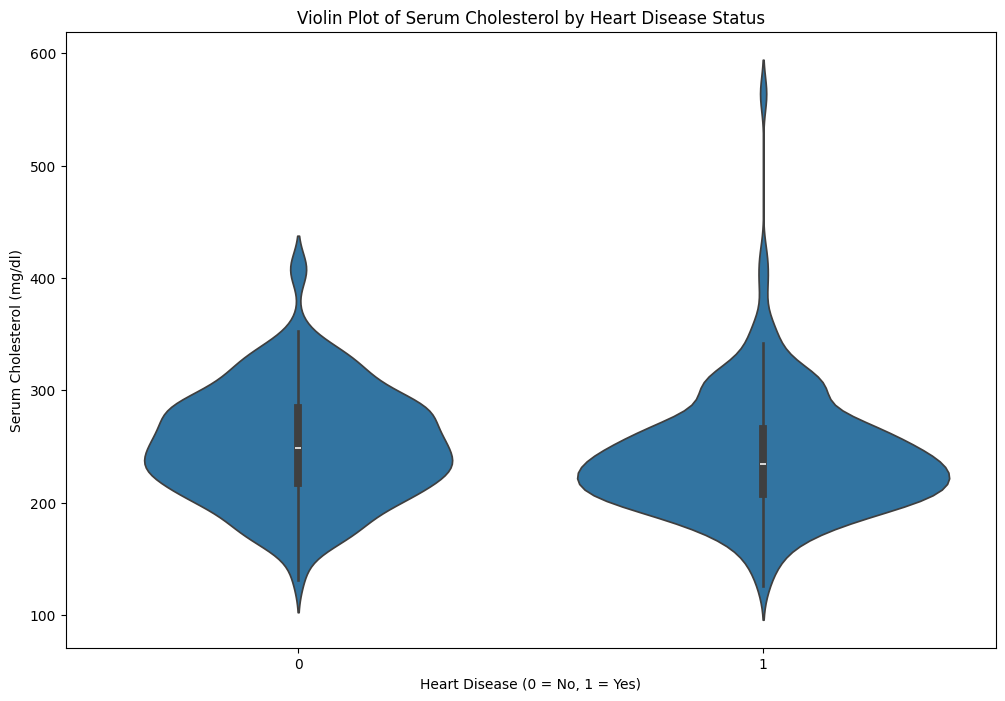

In [34]:
# Violin plot for multiple numeric features grouped by 'target' (Heart Disease)
plt.figure(figsize=(12, 8))
sns.violinplot(x='target', y='thalach', data=heart_data)
plt.title('Violin Plot of Maximum Heart Rate Achieved by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='target', y='oldpeak', data=heart_data)
plt.title('Violin Plot of Depression Induced by Exercise by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Depression Induced by Exercise (oldpeak)')
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='target', y='chol', data=heart_data)
plt.title('Violin Plot of Serum Cholesterol by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.show()


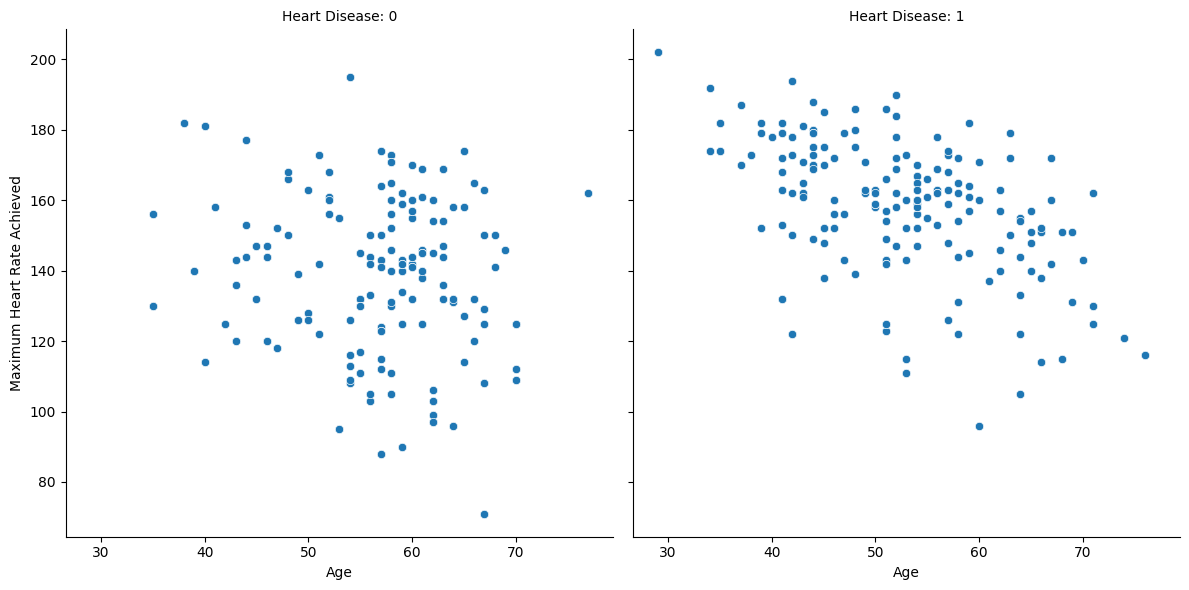

In [35]:
# FacetGrid to visualize multiple features by 'target'
g = sns.FacetGrid(heart_data, col='target', height=6)
g.map(sns.scatterplot, 'age', 'thalach')
g.set_axis_labels('Age', 'Maximum Heart Rate Achieved')
g.set_titles('Heart Disease: {col_name}')
plt.show()


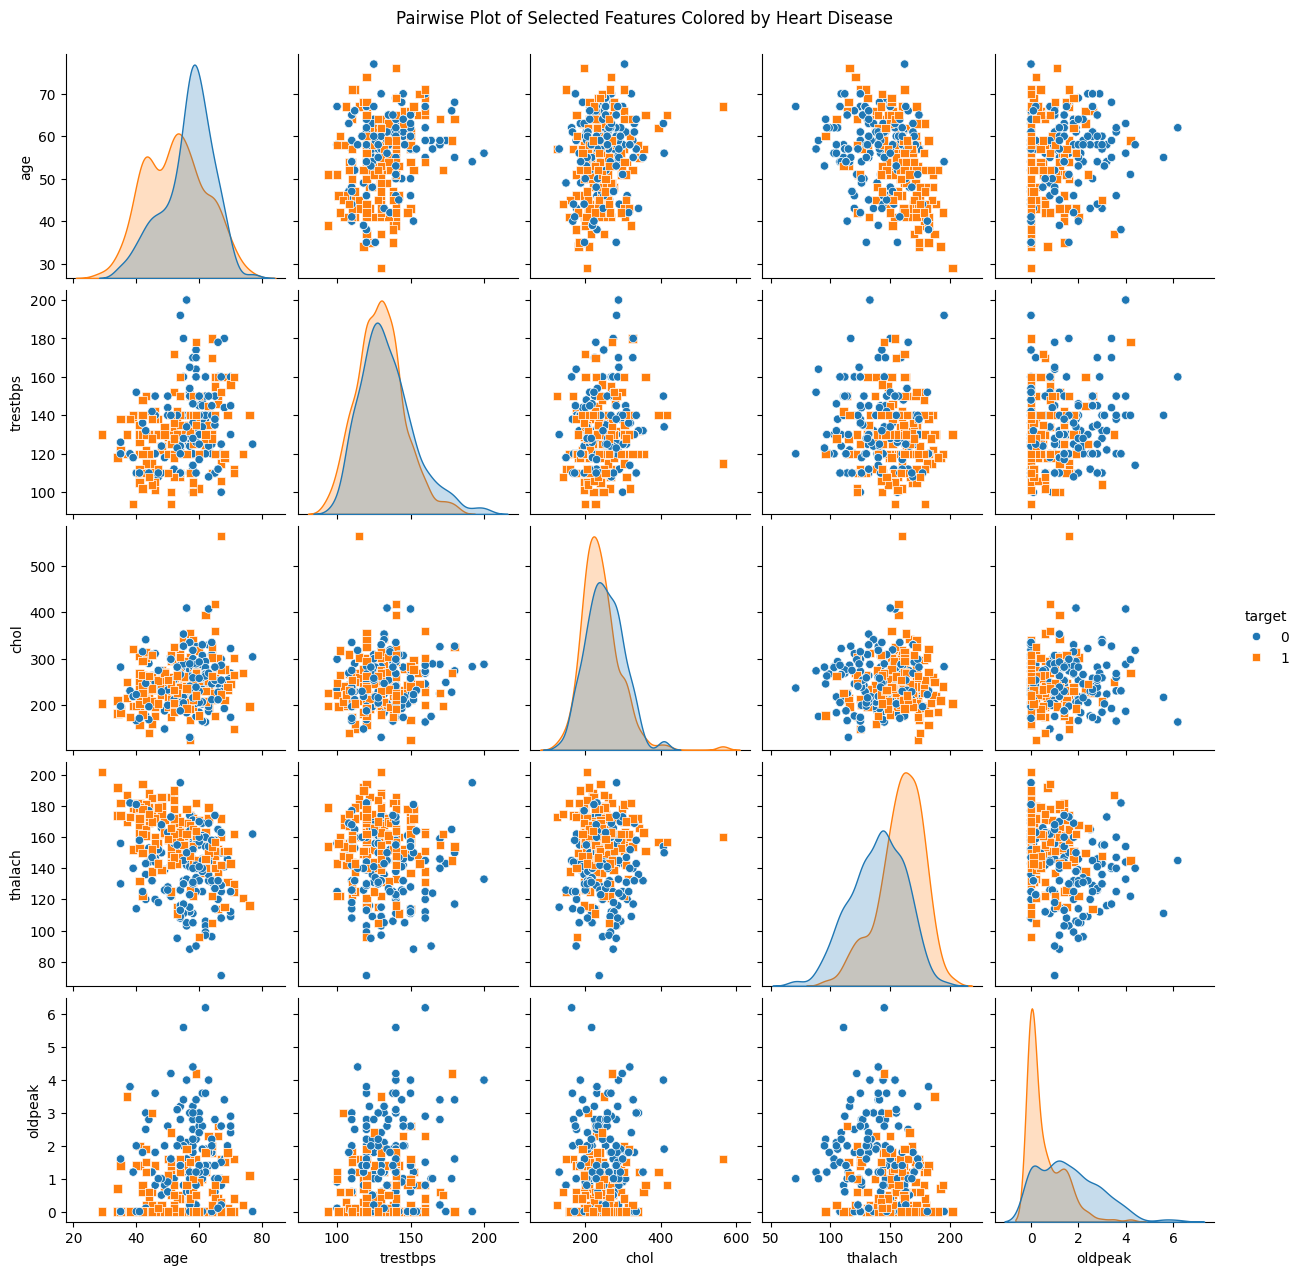

In [36]:
# Pairplot for a subset of features colored by 'target'
sns.pairplot(heart_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target', kind='scatter', markers=["o", "s"])
plt.suptitle('Pairwise Plot of Selected Features Colored by Heart Disease', y=1.02)
plt.show()


## Feature Engineering

### Age groups

In [37]:

bins = [20, 40, 60, 80, 100]
labels = ['young', 'middle-aged', 'old', 'elderly']
heart_data['age_group'] = pd.cut(heart_data['age'], bins=bins, labels=labels, right=False)


### Higher heart rate(hrr)

In [38]:
heart_data['hrr'] = heart_data['thalach'] - heart_data['oldpeak']

### Interaction terms

In [39]:
# Creating interaction terms between key features
heart_data['age_chol_interaction'] = heart_data['age'] * heart_data['chol']
heart_data['trestbps_oldpeak_interaction'] = heart_data['trestbps'] * heart_data['oldpeak']
heart_data['thalach_age_interaction'] = heart_data['thalach'] * heart_data['age']

### Chest pain type and age interaction

In [40]:
heart_data['cp_age_group_interaction'] = heart_data['cp'].astype(str) + '_' + heart_data['age_group'].astype(str)

### Bmi

In [41]:
# This is a simplistic approach; using cholestrol and blood pressure to calculate bmi
heart_data['bmi_proxy'] = (heart_data['chol'] / heart_data['trestbps']) * (heart_data['age'] / 10)

In [42]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,age_group,hrr,age_chol_interaction,trestbps_oldpeak_interaction,thalach_age_interaction,cp_age_group_interaction,bmi_proxy
0,52,1,0,125,212,0,1,168,0,1.0,...,2,3,0,middle-aged,167.0,11024,125.0,8736,0_middle-aged,8.819200
1,53,1,0,140,203,1,0,155,1,3.1,...,0,3,0,middle-aged,151.9,10759,434.0,8215,0_middle-aged,7.685000
2,70,1,0,145,174,0,1,125,1,2.6,...,0,3,0,old,122.4,12180,377.0,8750,0_old,8.400000
3,61,1,0,148,203,0,1,161,0,0.0,...,1,3,0,old,161.0,12383,0.0,9821,0_old,8.366892
4,62,0,0,138,294,1,1,106,0,1.9,...,3,2,0,old,104.1,18228,262.2,6572,0_old,13.208696


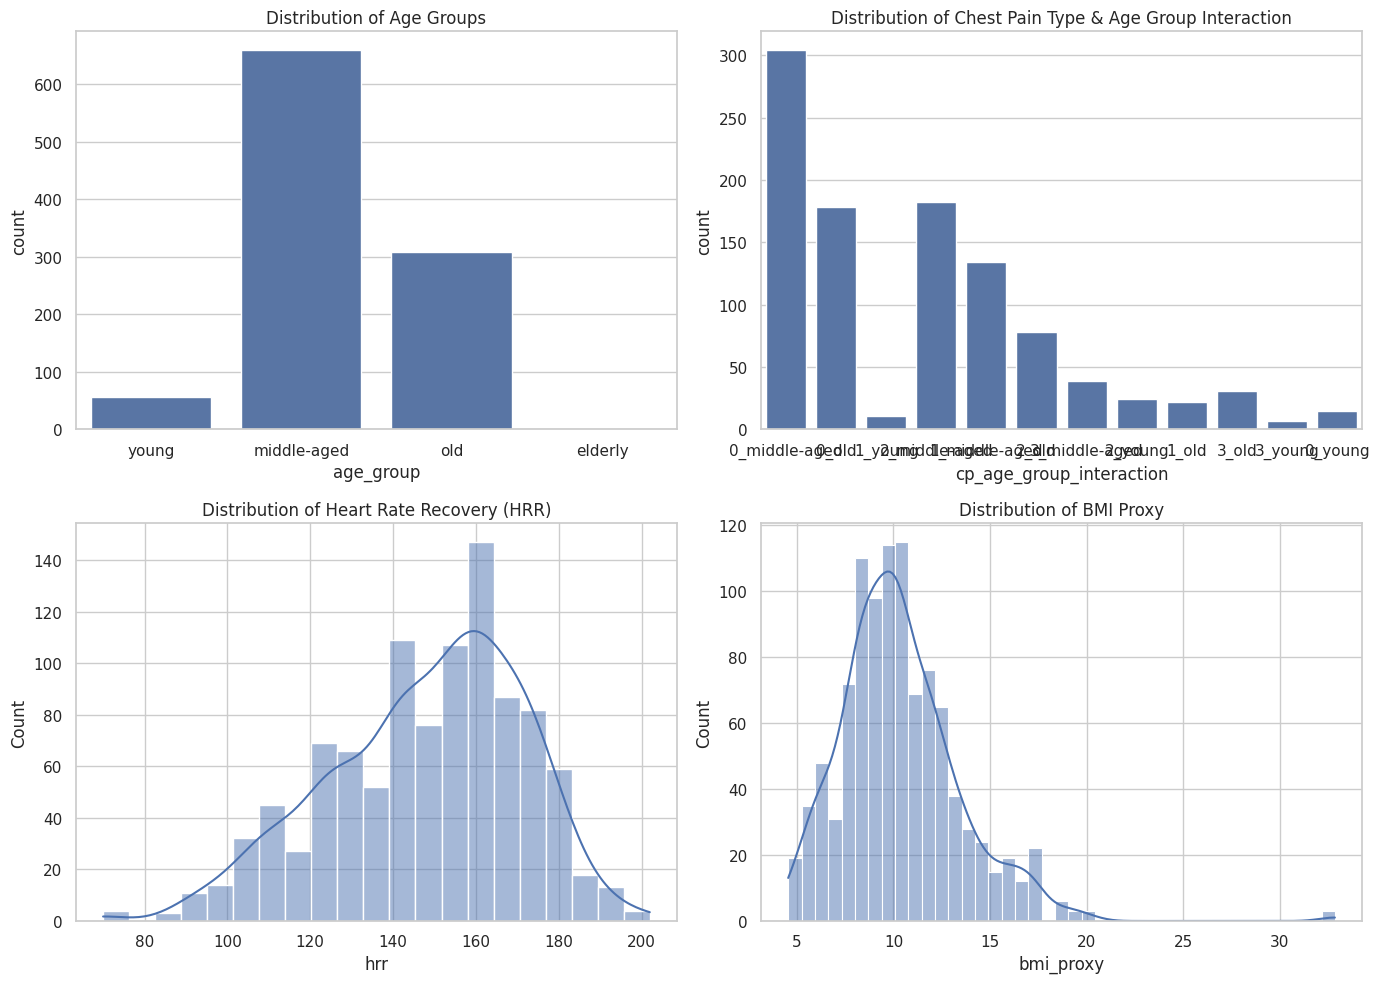

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Univariate analysis for the engineered features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of age_group
sns.countplot(x='age_group', data=heart_data, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age Groups')

# Distribution of cp_age_group_interaction (Chest Pain Type & Age Group)
sns.countplot(x='cp_age_group_interaction', data=heart_data, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Chest Pain Type & Age Group Interaction')

# Distribution of HRR (Heart Rate Recovery)
sns.histplot(heart_data['hrr'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Heart Rate Recovery (HRR)')

# Distribution of bmi_proxy (BMI Proxy)
sns.histplot(heart_data['bmi_proxy'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of BMI Proxy')

plt.tight_layout()
plt.show()


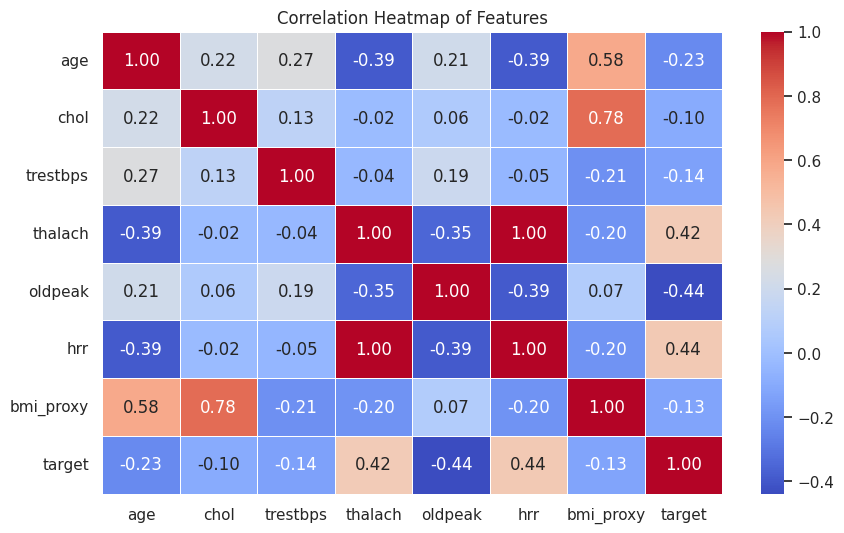

In [44]:
# Correlation Heatmap of Engineered Features and Other Features
corr = heart_data[['age', 'chol', 'trestbps', 'thalach', 'oldpeak', 'hrr', 'bmi_proxy', 'target']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


## Data Preprocessing

In [45]:
# Check columns with non-numeric data types
categorical_columns = heart_data.select_dtypes(include=['object']).columns
print("Categorical Columns: ", categorical_columns)

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to all categorical columns
for col in categorical_columns:
    heart_data[col] = label_encoder.fit_transform(heart_data[col])

# Verify that all columns are numeric now
print(heart_data.head())


Categorical Columns:  Index(['cp_age_group_interaction'], dtype='object')
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   52    1   0       125   212    0        1      168      0      1.0  ...   
1   53    1   0       140   203    1        0      155      1      3.1  ...   
2   70    1   0       145   174    0        1      125      1      2.6  ...   
3   61    1   0       148   203    0        1      161      0      0.0  ...   
4   62    0   0       138   294    1        1      106      0      1.9  ...   

   ca  thal  target    age_group    hrr  age_chol_interaction  \
0   2     3       0  middle-aged  167.0                 11024   
1   0     3       0  middle-aged  151.9                 10759   
2   0     3       0          old  122.4                 12180   
3   1     3       0          old  161.0                 12383   
4   3     2       0          old  104.1                 18228   

   trestbps_oldpeak_interaction  thalach_age_interaction  \


In [46]:
# Apply One-Hot Encoding for columns with multiple categories
heart_data = pd.get_dummies(heart_data, drop_first=True)  # drop_first to avoid multicollinearity


In [47]:
# Check the data types after encoding
print(heart_data.dtypes)


age                               int64
sex                               int64
cp                                int64
trestbps                          int64
chol                              int64
fbs                               int64
restecg                           int64
thalach                           int64
exang                             int64
oldpeak                         float64
slope                             int64
ca                                int64
thal                              int64
target                            int64
hrr                             float64
age_chol_interaction              int64
trestbps_oldpeak_interaction    float64
thalach_age_interaction           int64
cp_age_group_interaction          int64
bmi_proxy                       float64
age_group_middle-aged              bool
age_group_old                      bool
age_group_elderly                  bool
dtype: object


## Model Implementation

### Naive Bayes Classifier

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define X (features) and Y (target)
X = heart_data.drop(columns=['target'])  # Features (excluding the target column)
Y = heart_data['target']  # Target (heart disease classification)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Feature scaling (though Naive Bayes does not require strict scaling, it can help in practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Naive Bayes model
naive_bayes = GaussianNB()

# Hyperparameter grid for tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],  # Smoothing to avoid zero variance issues
}

# GridSearchCV to search for the best combination of hyperparameters
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the training data
grid_search.fit(X_train_scaled, Y_train)

# Best hyperparameters from the grid search
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best Naive Bayes model
best_naive_bayes = grid_search.best_estimator_

# Predictions
naive_bayes_predictions = best_naive_bayes.predict(X_test_scaled)

# Evaluate the model
print("Naive Bayes Accuracy: ", accuracy_score(Y_test, naive_bayes_predictions))
print("Classification Report:\n", classification_report(Y_test, naive_bayes_predictions))


Best Hyperparameters: {'var_smoothing': 1e-09}
Naive Bayes Accuracy:  0.751219512195122
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.69      0.73       102
           1       0.72      0.82      0.77       103

    accuracy                           0.75       205
   macro avg       0.76      0.75      0.75       205
weighted avg       0.76      0.75      0.75       205



### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [50]:
# Define X (features) and Y (target)
X = heart_data.drop(columns=['target'])  # Features (excluding the target column)
Y = heart_data['target']  # Target (heart disease classification)

In [51]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Feature scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 0.5, 1.0, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],  # Optimization algorithms
    'max_iter': [100, 200, 500],  # Maximum number of iterations
}

# GridSearchCV to search for the best combination of hyperparameters
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the training data
grid_search.fit(X_train_scaled, Y_train)

# Best hyperparameters from the grid search
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best Logistic Regression model
best_log_reg = grid_search.best_estimator_

# Predictions
log_reg_predictions = best_log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy: ", accuracy_score(Y_test, log_reg_predictions))
print("Classification Report:\n", classification_report(Y_test, log_reg_predictions))

Best Hyperparameters: {'C': 1.0, 'max_iter': 100, 'solver': 'liblinear'}
Logistic Regression Accuracy:  0.7804878048780488
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.70      0.76       102
           1       0.74      0.86      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205



### Neural Network (MLP using Keras)

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Define the Neural Network model
def create_mlp_model():
    model = Sequential()

    # Input layer and first hidden layer
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Adjust input_dim based on number of features

    # Second hidden layer
    model.add(Dense(32, activation='relu'))

    # Output layer (binary classification)
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the model
mlp_model = create_mlp_model()

# Fit the Neural Network model
history = mlp_model.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predictions and evaluation on test data
y_pred_mlp = (mlp_model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate performance
print("MLP Neural Network Accuracy: ", accuracy_score(Y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(Y_test, y_pred_mlp))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6633 - loss: 0.6298 - val_accuracy: 0.7439 - val_loss: 0.5417
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8309 - loss: 0.4418 - val_accuracy: 0.7622 - val_loss: 0.4867
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8602 - loss: 0.3702 - val_accuracy: 0.7927 - val_loss: 0.4613
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8623 - loss: 0.3137 - val_accuracy: 0.8110 - val_loss: 0.4443
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8663 - loss: 0.3025 - val_accuracy: 0.8110 - val_loss: 0.4322
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8773 - loss: 0.2772 - val_accuracy: 0.8171 - val_loss: 0.4215
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8796 - loss: 0.2649 - val_accuracy: 0.8354 - val_loss: 0.4191
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8973 - loss: 0.2274 - val_accuracy: 0.8354 - val_loss: 0.4160
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


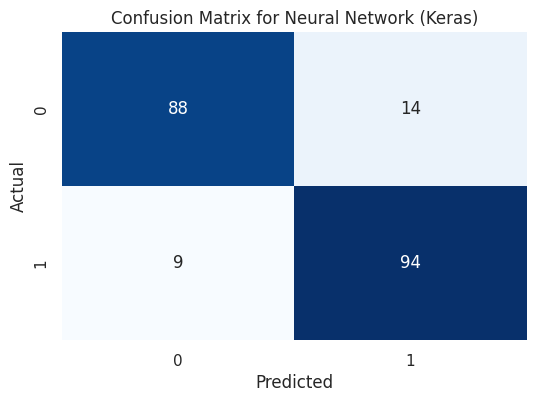

In [54]:
from sklearn.metrics import confusion_matrix

# Predict on test data (ensure the output is in binary format)
y_pred_mlp = (mlp_model.predict(X_test_scaled) > 0.5).astype("int32")

# Create the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_mlp)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Neural Network (Keras)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [56]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [63]:
from google.colab import files
uploaded = files.upload()


Saving best_heart_disease_model.h5 to best_heart_disease_model.h5


In [67]:
# Import necessary libraries
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model

# Load the Keras model
mlp_model = load_model('best_heart_disease_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    try:
        # Prepare the input array, with additional dummy values for missing features
        # Assuming the last 9 features are some constants or defaults
        missing_features = [0] * 9  # Replace this with real values if available
        input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal] + missing_features])

        # Make the prediction using the MLP model
        prediction = mlp_model.predict(input_data)
        predicted_class = int(np.round(prediction[0][0]))

        # Return the prediction result
        return "High risk of heart disease" if predicted_class == 1 else "Low risk of heart disease"

    except Exception as e:
        # Handle any errors that occur during prediction
        return f"An error occurred: {str(e)}"


In [76]:
import gradio as gr

# Define the Gradio interface with inputs and outputs
interface = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Slider(0, 120, label="Age"),
        gr.Radio([0, 1], label="Sex (0 = Female, 1 = Male)"),
        gr.Dropdown([0, 1, 2, 3], label="Chest Pain Type (cp)"),
        gr.Slider(80, 200, label="Resting Blood Pressure (trestbps)"),
        gr.Slider(100, 400, label="Serum Cholesterol (chol)"),
        gr.Radio([0, 1], label="Fasting Blood Sugar > 120 mg/dl (fbs)"),
        gr.Dropdown([0, 1, 2], label="Resting Electrocardiographic Results (restecg)"),
        gr.Slider(60, 220, label="Maximum Heart Rate Achieved (thalach)"),
        gr.Radio([0, 1], label="Exercise Induced Angina (exang)"),
        gr.Slider(0.0, 6.0, label="ST Depression Induced by Exercise (oldpeak)"),
        gr.Slider(0, 2, label="Slope of Peak Exercise ST Segment (slope)"),
        gr.Slider(0, 3, label="Number of Major Vessels (0-3) Colored by Flourosopy (ca)"),
        gr.Slider(0, 3, label="Thalassemia (thal)")
    ],
    outputs="text"
)

# Launch the Gradio interface
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8139d1ab40c3a93f60.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
